In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
import sklearn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df_all = df.copy()

df_stroke = df[df['stroke']==1]

df_non = df[df['stroke']==0]

In [5]:
def plot_pie(column, title="All"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%',labels=data.index)
    plt.title(title)
    plt.show()
    
def plot_hist(column, title="all"):
    plt.hist(df_all[column],density=True)
    plt.title(title)
    plt.show()

def plot_bar(column, sort=False, title="all"):
    if sort:
        data_all = df_all[column].value_counts().sort_index()
    else:
        data_all = df_all[column].value_counts()
    plt.bar(data_all.index,data_all)
    plt.title(title)
    plt.show()
    
def plot_bar_compare(column, sort=False):
    if sort:
        data_churned = df_stroke[column].value_counts().sort_index()
        data_nonchurned = df_non[column].value_counts().sort_index()
    else:
        data_churned = df_stroke[column].value_counts()
        data_nonchurned = df_non[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].bar(data_nonchurned.index,data_nonchurned)
    axs[0].title.set_text('No Stroke')
    axs[1].bar(data_churned.index,data_churned)
    axs[1].title.set_text('Has Stroke')
    plt.show()

def plot_hist_compare(column, bins=5):
    plt.hist([df_non[column], df_stroke[column]] , color=['c','r'])
    plt.legend(('No Stroke', 'Has Stroke'))
    plt.show()
    
def plot_pie_compare(column):
    data_churned = df_stroke[column].value_counts()
    data_nonchurned = df_non[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].pie(data_nonchurned,autopct='%1.2f%%',labels=data_nonchurned.index)
    axs[0].title.set_text('No Stroke')
    axs[1].pie(data_churned,autopct='%1.2f%%',labels=data_churned.index)
    axs[1].title.set_text('Has Stroke')
    plt.show()

def plot_boxplot(column, title=""):
    sns.boxplot(x="stroke", y=column, palette=["c", "r"],
            hue="stroke",  data=df_all).set_title(title, fontsize=15)

def check_median(column):
    data_churned = df_stroke[column].describe()
    data_nonchurned = df_non[column].describe()
    print('No Stroke: {}'.format(data_nonchurned['50%']))
    print('Has Stroke: {}'.format(data_churned['50%']))

def check_most(column):
    data_churned = df_stroke[column].value_counts()
    data_nonchurned = df_non[column].value_counts()
    print('No Stroke: {}'.format(data_nonchurned))
    print('Has Stroke: {}'.format(data_churned))

## Stroke

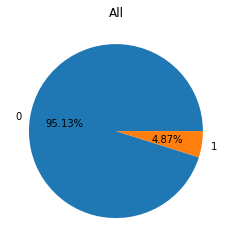

In [6]:
plot_pie('stroke')

## Gender

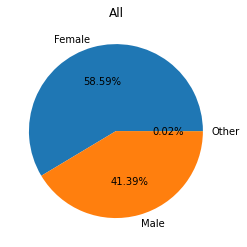

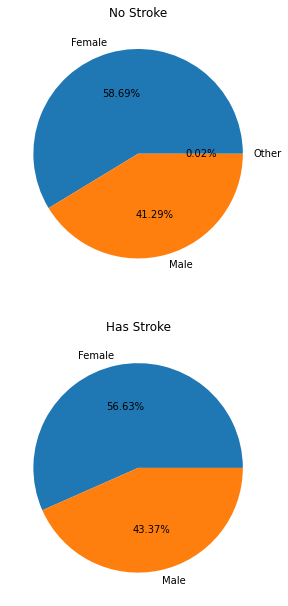

In [7]:
plot_pie('gender')
plot_pie_compare('gender')

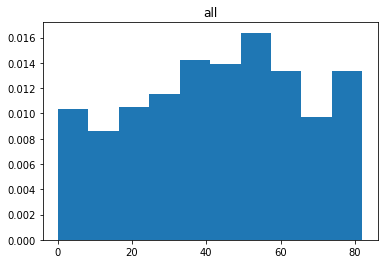

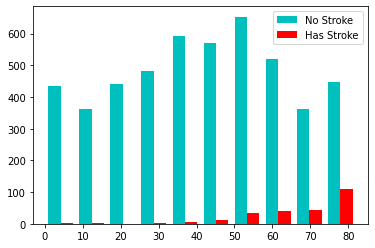

In [8]:
plot_hist('age')
plot_hist_compare('age')

In [9]:
check_median('age')

No Stroke: 43.0
Has Stroke: 71.0


## hypertension

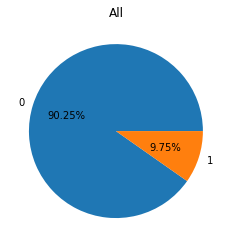

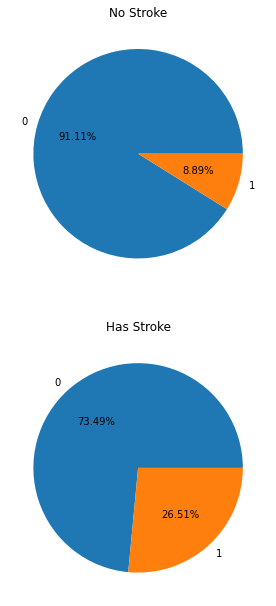

In [10]:
plot_pie('hypertension')
plot_pie_compare('hypertension')

In [11]:
check_most('hypertension')

No Stroke: 0    4429
1     432
Name: hypertension, dtype: int64
Has Stroke: 0    183
1     66
Name: hypertension, dtype: int64


## heart_disease

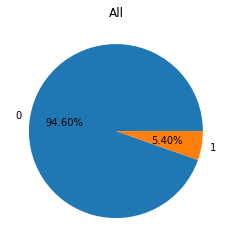

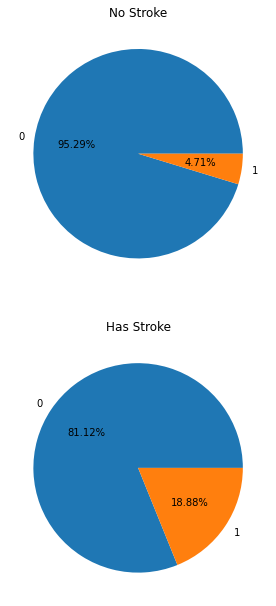

In [12]:
plot_pie('heart_disease')
plot_pie_compare('heart_disease')

## ever_married

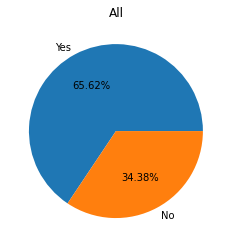

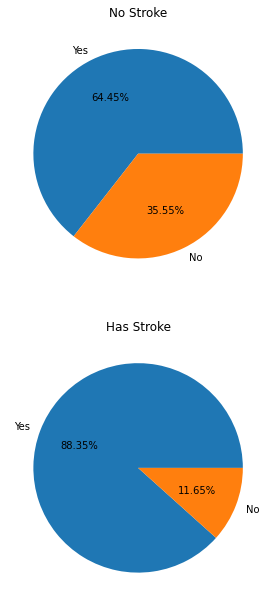

In [13]:
plot_pie('ever_married')
plot_pie_compare('ever_married')

In [14]:
check_most('ever_married')

No Stroke: Yes    3133
No     1728
Name: ever_married, dtype: int64
Has Stroke: Yes    220
No      29
Name: ever_married, dtype: int64


## Work_Type

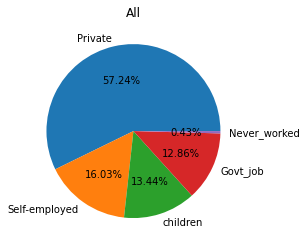

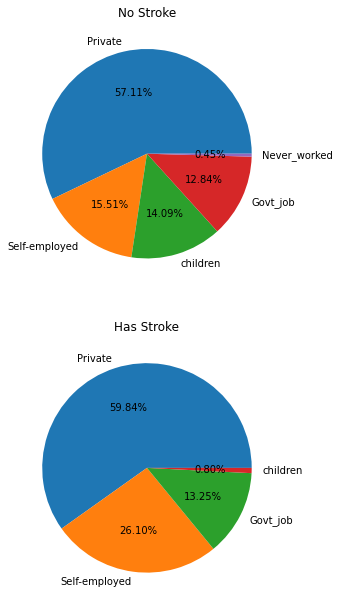

In [15]:
plot_pie('work_type')
plot_pie_compare('work_type')

## Residence_type

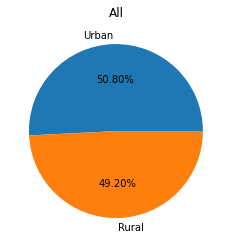

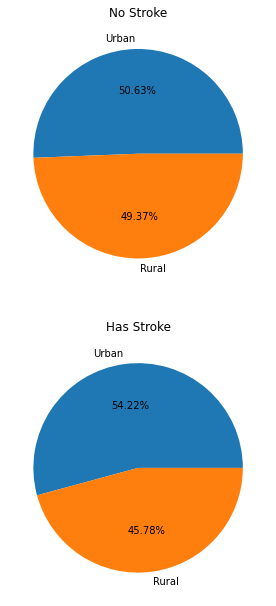

In [16]:
plot_pie('Residence_type')
plot_pie_compare('Residence_type')

## avg_glucose_level

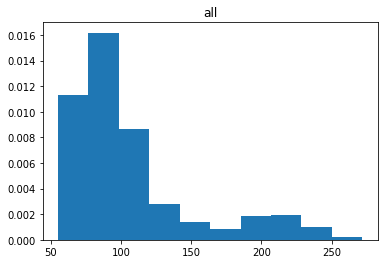

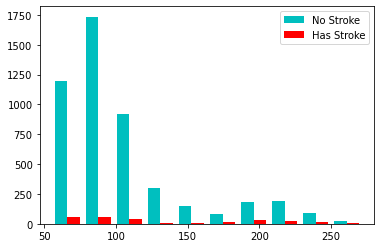

In [17]:
plot_hist('avg_glucose_level')
plot_hist_compare('avg_glucose_level')

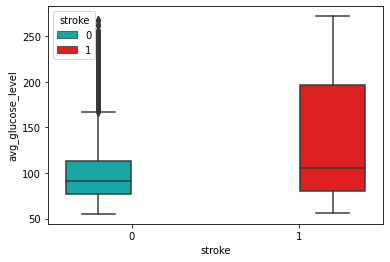

In [18]:
plot_boxplot('avg_glucose_level')

In [19]:
check_median('avg_glucose_level')

No Stroke: 91.47
Has Stroke: 105.22


## bmi 

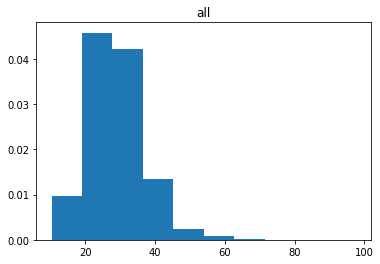

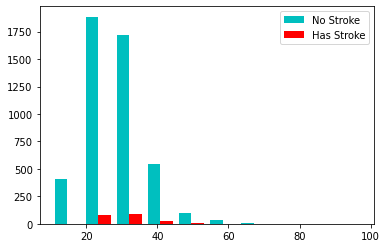

In [20]:
plot_hist('bmi')
plot_hist_compare('bmi')

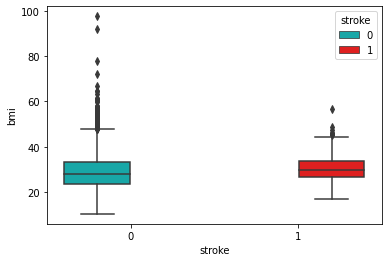

In [21]:
plot_boxplot('bmi')

In [22]:
check_median('bmi')


No Stroke: 28.0
Has Stroke: 29.7


In [23]:
df['bmi'].isnull().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

In [24]:
print("% of Null Values in bmi column: ",(201/4909) * 100,"%")

% of Null Values in bmi column:  4.094520268893868 %


## smoking_status

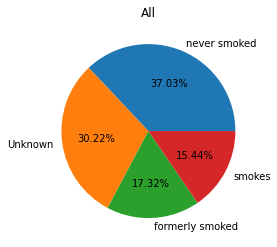

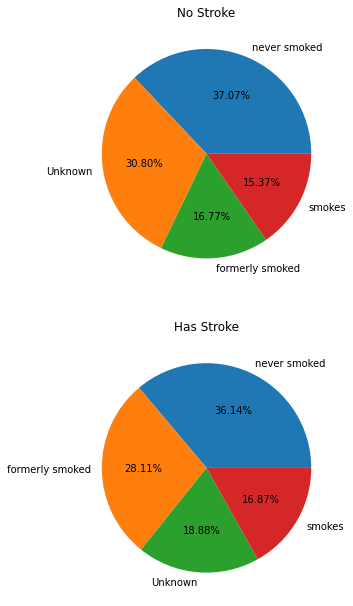

In [25]:
plot_pie('smoking_status')
plot_pie_compare('smoking_status')

## Conclusion till now

| | No Stroke| Has Stroke | Note
| :- | :-: | :-: | :-: |
| gender (Most) | Female | Female | No Clear Difference  also Other catagory can be ignore
| age (Median) | 43 | 71 | the median age of stroke patients is higher than patient with no stroke
| hypertension (Most) | 0 | 0 | the patient who has hypertension from stroke patient is 18 % higher than the patient with no stroke
| heart_disease (Most) | 0 | 0 | the patient who has heart disease from stroke patient is 14 % higher than the patient with no stroke
| ever_married (Most) | Yes | Yes | the patient who ever married from stroke patient is 24 % higher than the patient with no stroke
| work_type (Most) | Private | Private | the patient who work as self-employed from stroke patient is 11.4% higher than the patient with no stroke
| Residence_type (Most) | Urban | Urban | No Clear Difference
| avg_glucose_level (Median) | 91.5 | 105.2 | the median of avg_glucose_level from Stroke Patient is higher than the Patient with no Stroke
| bmi (Median) | 28.3 | 30.5 | the median of bmi from Stroke Patient is little higher than the Patient with no Stroke
| smoking_status (Most) | never smoked | never smoked | The patient who smokes or formerly smoked from is 13% higher than the patient with no stroke
| Whole Dataset | 95.13% | 4.87% | The Data Is Imbalanced

## Comparing Features

### Age And bmi

Text(0, 0.5, '')

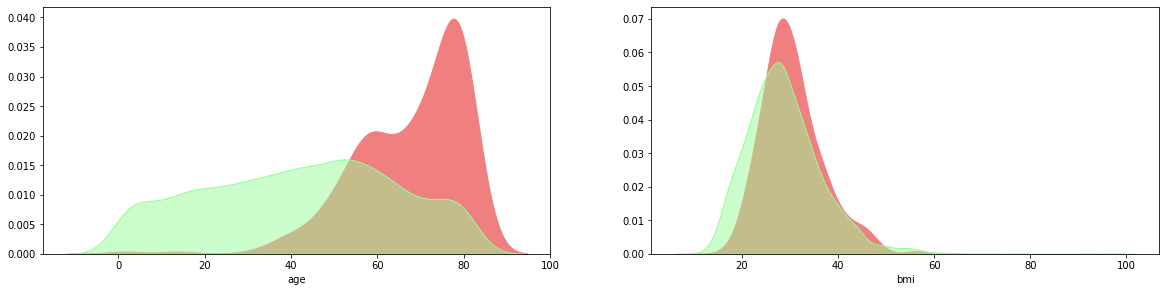

In [26]:
fig=plt.figure(figsize=(20,10),facecolor='white')
gs=fig.add_gridspec(2,2)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])


sns.kdeplot(data=df_stroke,x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df_non,x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
ax[0].set_ylabel('')

sns.kdeplot(data=df_stroke,x='bmi',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df_non,x='bmi',ax=ax[1],shade=True,color='palegreen',alpha=0.5)
ax[1].set_ylabel('')

Observations:

1. People with age 65-85 have high chances of getting stroke. 
2. bmi can't distinguish stroke patterns and also have 4% missing values, Hence It can be drop.

## Final Conclusion

Observations:

1. People with age 65-85 have high chances of getting stroke. 
2. bmi can't distinguish stroke patterns and also have 4% missing values, hence I will drop this feature.
3. there are higher samples of no stroke (stroke=0) as compared to the other class. Hence it is a Highly Imbalanced dataset
4. Others category in 'gender' can be ignored
5. Type of Residence either Urban or Rural has no effect on having stroke. This feature can also be dropped.
6. Dataset is Imbalanced

## Data Preprocessing

### 1. Null value removing or Removing features

In [27]:
# Drop bmi Column
df = df.drop('bmi', axis=1)

# Drop Id Column
df = df.drop('id',axis = 1)

# Drop Residence Column
df = df.drop('Residence_type',axis=1)

# Remove rows contain gender=='Other'
df = df[df['gender'] != 'Other']

### 2. Label Encoding

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,never smoked,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   smoking_status     5109 non-null   object 
 8   stroke             5109 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 399.1+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [31]:
gender = enc.fit_transform(df['gender'])
smoking_status = enc.fit_transform(df['smoking_status'])
work_type = enc.fit_transform(df['work_type'])
ever_married = enc.fit_transform(df['ever_married'])
# Residence_type = enc.fit_transform(df['Residence_type'])

df['gender'] = gender
df['smoking_status'] = smoking_status
df['work_type'] = work_type
df['ever_married'] = ever_married
# df['Residence_type'] = Residence_type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   avg_glucose_level  5109 non-null   float64
 7   smoking_status     5109 non-null   int64  
 8   stroke             5109 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 399.1 KB


In [32]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,228.69,1,1
1,0,61.0,0,0,1,3,202.21,2,1
2,1,80.0,0,1,1,2,105.92,2,1
3,0,49.0,0,0,1,2,171.23,3,1
4,0,79.0,1,0,1,3,174.12,2,1
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,83.75,2,0
5106,0,81.0,0,0,1,3,125.20,2,0
5107,0,35.0,0,0,1,3,82.99,2,0
5108,1,51.0,0,0,1,2,166.29,1,0


### 3. Standardizing and splitting

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = df.drop('stroke', axis=1)
y = df['stroke']

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 102)


In [34]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape


((4087, 8), (1022, 8), (4087,), (1022,))

### 4.Imbalanced data handling

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_bal, Y_bal = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)


# from imblearn.under_sampling import NearMiss
# undersample = NearMiss(version=2, n_neighbors=1)
# X_bal, Y_bal = undersample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)


# from imblearn.under_sampling import TomekLinks
# undersample = TomekLinks()
# X_bal, Y_bal = undersample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)


# from imblearn.under_sampling import EditedNearestNeighbours
# undersample = EditedNearestNeighbours(n_neighbors=3)
# X_bal, Y_bal = undersample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)


# from imblearn.under_sampling import NeighbourhoodCleaningRule
# undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# X_bal, Y_bal = undersample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)


input_shape = [X_train.shape[1]]

In [36]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((7776, 8), (1944, 8), (7776,), (1944,))

In [37]:
all_model = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), BernoulliNB(), SVC()]

recall = []
precision = []
f1=[]
balanced_accuracy=[]


for model in all_model:
    cv = cross_val_score(model, X_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='precision', cv=10).mean()
    precision.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='f1', cv=10).mean()
    f1.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=10).mean()
    balanced_accuracy.append(cv)

model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'BernoulliNB', 'SVC']

score = pd.DataFrame({'Model': model, 'Precision': precision, 'Recall': recall, 'F1':f1, 'balanced_accuracy':balanced_accuracy})
score.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,F1,balanced_accuracy
0,LogisticRegression,0.763086,0.821421,0.791118,0.785868
1,KNeighborsClassifier,0.844070,0.962831,0.899492,0.894242
2,DecisionTreeClassifier,0.901967,0.901478,0.902399,0.903420
3,RandomForestClassifier,0.926113,0.947494,0.934412,0.935698
4,BernoulliNB,0.661438,0.930600,0.773198,0.731904
5,SVC,0.782288,0.886156,0.830798,0.822309


###### We can see the difference in learning with proper training. Random Forest outperform with clear win! Let's train RF model and evaluate it's performance on test data

In [38]:
model_1 = RandomForestClassifier(random_state=1)

# Train the model (will take about 10 minutes to run)
model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)

#print(confusion_matrix(y_test, pred, labels=(1,0)))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       931
           1       0.94      0.95      0.94      1013

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



### Trying Boosting Ensemble method

In [39]:
from xgboost import XGBClassifier
model_2 = XGBClassifier(n_estimators=1000,learning_rate=0.05) # Your code here

# Fit the model
model_2.fit(X_train, y_train, 
             early_stopping_rounds=20, 
             eval_set=[(X_test, y_test)], 
             verbose=False) # Your code here

# Get predictions
predictions_2 = model_2.predict(X_test) # Your code here

print(classification_report(y_test, predictions_2))

[15:19:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       931
           1       0.97      0.95      0.96      1013

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



In [40]:
print("Accuracy of final XGBoost model :",accuracy_score(y_test,predictions_2)*100)

Accuracy of final XGBoost model : 96.14197530864197


## For Our Model Recall Value Is more important Because ,we would like to detect as many stroke patients as possible

# TF With Keras

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

2022-05-06 15:19:55.537568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-06 15:19:55.537634: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [42]:
model = keras.Sequential([
    # input layer
    layers.BatchNormalization(input_shape=input_shape),
    # hidden layer 1
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    # hidden layer 2
    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    # hidden layer 3
    layers.Dense(units=64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    # hidden layer 4
    layers.Dense(units=32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(units=3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

2022-05-06 15:19:58.311985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-06 15:19:58.312035: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-06 15:19:58.312053: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bhargav-HP-Laptop-14s-cr1xxx): /proc/driver/nvidia/version does not exist
2022-05-06 15:19:58.313074: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=3000,
)

Epoch 1/3000
16/16 [==============================] - 1s 19ms/step - loss: 1.7264 - accuracy: 0.3818 - val_loss: 1.0466 - val_accuracy: 0.6116
Epoch 2/3000
16/16 [==============================] - 0s 11ms/step - loss: 1.5946 - accuracy: 0.4074 - val_loss: 0.9943 - val_accuracy: 0.6548
Epoch 3/3000
16/16 [==============================] - 0s 11ms/step - loss: 1.4841 - accuracy: 0.4441 - val_loss: 0.9555 - val_accuracy: 0.6641
Epoch 4/3000
16/16 [==============================] - 0s 9ms/step - loss: 1.4305 - accuracy: 0.4613 - val_loss: 0.9232 - val_accuracy: 0.6785
Epoch 5/3000
16/16 [==============================] - 0s 10ms/step - loss: 1.3706 - accuracy: 0.4817 - val_loss: 0.8937 - val_accuracy: 0.6903
Epoch 6/3000
16/16 [==============================] - 0s 11ms/step - loss: 1.3019 - accuracy: 0.5044 - val_loss: 0.8671 - val_accuracy: 0.7032
Epoch 7/3000
16/16 [==============================] - 0s 10ms/step - loss: 1.2519 - accuracy: 0.5273 - val_loss: 0.8424 - val_accuracy: 0.7109


16/16 [==============================] - 0s 11ms/step - loss: 0.7455 - accuracy: 0.7478 - val_loss: 0.6069 - val_accuracy: 0.7963
Epoch 59/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.7537 - accuracy: 0.7378 - val_loss: 0.6057 - val_accuracy: 0.7968
Epoch 60/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.7379 - accuracy: 0.7450 - val_loss: 0.6045 - val_accuracy: 0.7968
Epoch 61/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.7330 - accuracy: 0.7465 - val_loss: 0.6040 - val_accuracy: 0.7978
Epoch 62/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.7414 - accuracy: 0.7481 - val_loss: 0.6026 - val_accuracy: 0.7984
Epoch 63/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.7333 - accuracy: 0.7425 - val_loss: 0.6013 - val_accuracy: 0.7973
Epoch 64/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.7216 - accuracy: 0.7476 - val_loss: 0.5994 - val_accuracy: 0.7968
Epoch 

Epoch 115/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.6057 - accuracy: 0.7699 - val_loss: 0.5317 - val_accuracy: 0.8004
Epoch 116/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.6144 - accuracy: 0.7760 - val_loss: 0.5306 - val_accuracy: 0.8009
Epoch 117/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.6076 - accuracy: 0.7771 - val_loss: 0.5295 - val_accuracy: 0.8009
Epoch 118/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.6118 - accuracy: 0.7726 - val_loss: 0.5282 - val_accuracy: 0.8009
Epoch 119/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.6071 - accuracy: 0.7686 - val_loss: 0.5263 - val_accuracy: 0.8009
Epoch 120/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.5950 - accuracy: 0.7762 - val_loss: 0.5250 - val_accuracy: 0.8009
Epoch 121/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.5989 - accuracy: 0.7704 - val_loss: 0.5246 - val_ac

16/16 [==============================] - 0s 11ms/step - loss: 0.4798 - accuracy: 0.7957 - val_loss: 0.4338 - val_accuracy: 0.8148
Epoch 228/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4783 - accuracy: 0.7940 - val_loss: 0.4332 - val_accuracy: 0.8153
Epoch 229/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4805 - accuracy: 0.7913 - val_loss: 0.4327 - val_accuracy: 0.8158
Epoch 230/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4846 - accuracy: 0.7921 - val_loss: 0.4327 - val_accuracy: 0.8148
Epoch 231/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4801 - accuracy: 0.7886 - val_loss: 0.4324 - val_accuracy: 0.8148
Epoch 232/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.4746 - accuracy: 0.7942 - val_loss: 0.4319 - val_accuracy: 0.8143
Epoch 233/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4718 - accuracy: 0.7960 - val_loss: 0.4314 - val_accuracy: 0.8143


16/16 [==============================] - 0s 11ms/step - loss: 0.4226 - accuracy: 0.8076 - val_loss: 0.3942 - val_accuracy: 0.8230
Epoch 340/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4180 - accuracy: 0.8131 - val_loss: 0.3942 - val_accuracy: 0.8236
Epoch 341/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4210 - accuracy: 0.8093 - val_loss: 0.3939 - val_accuracy: 0.8241
Epoch 342/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.4214 - accuracy: 0.8119 - val_loss: 0.3935 - val_accuracy: 0.8236
Epoch 343/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.4179 - accuracy: 0.8113 - val_loss: 0.3926 - val_accuracy: 0.8246
Epoch 344/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.4185 - accuracy: 0.8089 - val_loss: 0.3927 - val_accuracy: 0.8230
Epoch 345/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.4179 - accuracy: 0.8098 - val_loss: 0.3924 - val_accuracy: 0.8236


16/16 [==============================] - 0s 11ms/step - loss: 0.3884 - accuracy: 0.8233 - val_loss: 0.3742 - val_accuracy: 0.8302
Epoch 452/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3916 - accuracy: 0.8192 - val_loss: 0.3743 - val_accuracy: 0.8297
Epoch 453/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3939 - accuracy: 0.8151 - val_loss: 0.3740 - val_accuracy: 0.8287
Epoch 454/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3907 - accuracy: 0.8261 - val_loss: 0.3739 - val_accuracy: 0.8292
Epoch 455/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3888 - accuracy: 0.8197 - val_loss: 0.3737 - val_accuracy: 0.8292
Epoch 456/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3893 - accuracy: 0.8245 - val_loss: 0.3733 - val_accuracy: 0.8297
Epoch 457/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3957 - accuracy: 0.8176 - val_loss: 0.3733 - val_accuracy: 0.8302


16/16 [==============================] - 0s 11ms/step - loss: 0.3757 - accuracy: 0.8279 - val_loss: 0.3610 - val_accuracy: 0.8354
Epoch 564/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3733 - accuracy: 0.8293 - val_loss: 0.3609 - val_accuracy: 0.8364
Epoch 565/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3762 - accuracy: 0.8322 - val_loss: 0.3608 - val_accuracy: 0.8344
Epoch 566/3000
16/16 [==============================] - 0s 16ms/step - loss: 0.3769 - accuracy: 0.8319 - val_loss: 0.3605 - val_accuracy: 0.8344
Epoch 567/3000
16/16 [==============================] - 0s 12ms/step - loss: 0.3787 - accuracy: 0.8315 - val_loss: 0.3604 - val_accuracy: 0.8344
Epoch 568/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3720 - accuracy: 0.8326 - val_loss: 0.3609 - val_accuracy: 0.8349
Epoch 569/3000
16/16 [==============================] - 0s 15ms/step - loss: 0.3765 - accuracy: 0.8281 - val_loss: 0.3608 - val_accuracy: 0.8364


16/16 [==============================] - 0s 11ms/step - loss: 0.3583 - accuracy: 0.8399 - val_loss: 0.3486 - val_accuracy: 0.8338
Epoch 676/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3532 - accuracy: 0.8389 - val_loss: 0.3484 - val_accuracy: 0.8349
Epoch 677/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3571 - accuracy: 0.8381 - val_loss: 0.3485 - val_accuracy: 0.8354
Epoch 678/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3554 - accuracy: 0.8416 - val_loss: 0.3480 - val_accuracy: 0.8349
Epoch 679/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.3623 - accuracy: 0.8382 - val_loss: 0.3475 - val_accuracy: 0.8344
Epoch 680/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3589 - accuracy: 0.8377 - val_loss: 0.3477 - val_accuracy: 0.8354
Epoch 681/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3555 - accuracy: 0.8423 - val_loss: 0.3481 - val_accuracy: 0.8349


16/16 [==============================] - 0s 11ms/step - loss: 0.3529 - accuracy: 0.8416 - val_loss: 0.3363 - val_accuracy: 0.8477
Epoch 788/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3464 - accuracy: 0.8465 - val_loss: 0.3361 - val_accuracy: 0.8472
Epoch 789/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3466 - accuracy: 0.8471 - val_loss: 0.3356 - val_accuracy: 0.8462
Epoch 790/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3486 - accuracy: 0.8438 - val_loss: 0.3351 - val_accuracy: 0.8477
Epoch 791/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3449 - accuracy: 0.8474 - val_loss: 0.3358 - val_accuracy: 0.8457
Epoch 792/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3432 - accuracy: 0.8452 - val_loss: 0.3359 - val_accuracy: 0.8447
Epoch 793/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3463 - accuracy: 0.8454 - val_loss: 0.3355 - val_accuracy: 0.8452


16/16 [==============================] - 0s 11ms/step - loss: 0.3319 - accuracy: 0.8544 - val_loss: 0.3248 - val_accuracy: 0.8621
Epoch 900/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3311 - accuracy: 0.8529 - val_loss: 0.3241 - val_accuracy: 0.8611
Epoch 901/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3373 - accuracy: 0.8468 - val_loss: 0.3242 - val_accuracy: 0.8611
Epoch 902/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3338 - accuracy: 0.8503 - val_loss: 0.3243 - val_accuracy: 0.8616
Epoch 903/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3328 - accuracy: 0.8534 - val_loss: 0.3240 - val_accuracy: 0.8627
Epoch 904/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3279 - accuracy: 0.8533 - val_loss: 0.3239 - val_accuracy: 0.8621
Epoch 905/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3319 - accuracy: 0.8510 - val_loss: 0.3242 - val_accuracy: 0.8616


16/16 [==============================] - 0s 11ms/step - loss: 0.3303 - accuracy: 0.8508 - val_loss: 0.3155 - val_accuracy: 0.8678
Epoch 1012/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3239 - accuracy: 0.8579 - val_loss: 0.3159 - val_accuracy: 0.8709
Epoch 1013/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3236 - accuracy: 0.8547 - val_loss: 0.3163 - val_accuracy: 0.8668
Epoch 1014/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.3270 - accuracy: 0.8556 - val_loss: 0.3160 - val_accuracy: 0.8688
Epoch 1015/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.3227 - accuracy: 0.8605 - val_loss: 0.3157 - val_accuracy: 0.8693
Epoch 1016/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3224 - accuracy: 0.8630 - val_loss: 0.3154 - val_accuracy: 0.8668
Epoch 1017/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.3256 - accuracy: 0.8573 - val_loss: 0.3151 - val_accuracy: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.3059 - accuracy: 0.8697 - val_loss: 0.3085 - val_accuracy: 0.8729
Epoch 1124/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3061 - accuracy: 0.8669 - val_loss: 0.3082 - val_accuracy: 0.8719
Epoch 1125/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3146 - accuracy: 0.8637 - val_loss: 0.3080 - val_accuracy: 0.8719
Epoch 1126/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3106 - accuracy: 0.8643 - val_loss: 0.3076 - val_accuracy: 0.8735
Epoch 1127/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3155 - accuracy: 0.8596 - val_loss: 0.3081 - val_accuracy: 0.8735
Epoch 1128/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3172 - accuracy: 0.8623 - val_loss: 0.3074 - val_accuracy: 0.8755
Epoch 1129/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3114 - accuracy: 0.8648 - val_loss: 0.3081 - val_accuracy: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.3123 - accuracy: 0.8646 - val_loss: 0.3014 - val_accuracy: 0.8771
Epoch 1236/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3104 - accuracy: 0.8632 - val_loss: 0.3014 - val_accuracy: 0.8771
Epoch 1237/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3096 - accuracy: 0.8637 - val_loss: 0.3016 - val_accuracy: 0.8745
Epoch 1238/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3065 - accuracy: 0.8645 - val_loss: 0.3011 - val_accuracy: 0.8745
Epoch 1239/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.3085 - accuracy: 0.8650 - val_loss: 0.3017 - val_accuracy: 0.8760
Epoch 1240/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3074 - accuracy: 0.8674 - val_loss: 0.3015 - val_accuracy: 0.8765
Epoch 1241/3000
16/16 [==============================] - 0s 19ms/step - loss: 0.3085 - accuracy: 0.8679 - val_loss: 0.3018 - val_accuracy: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2948 - accuracy: 0.8747 - val_loss: 0.2973 - val_accuracy: 0.8801
Epoch 1348/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3018 - accuracy: 0.8711 - val_loss: 0.2965 - val_accuracy: 0.8786
Epoch 1349/3000
16/16 [==============================] - 0s 12ms/step - loss: 0.3065 - accuracy: 0.8636 - val_loss: 0.2965 - val_accuracy: 0.8791
Epoch 1350/3000
16/16 [==============================] - 0s 12ms/step - loss: 0.2989 - accuracy: 0.8702 - val_loss: 0.2965 - val_accuracy: 0.8791
Epoch 1351/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.3052 - accuracy: 0.8642 - val_loss: 0.2966 - val_accuracy: 0.8796
Epoch 1352/3000
16/16 [==============================] - 0s 10ms/step - loss: 0.2979 - accuracy: 0.8738 - val_loss: 0.2971 - val_accuracy: 0.8796
Epoch 1353/3000
16/16 [==============================] - 0s 12ms/step - loss: 0.2952 - accuracy: 0.8731 - val_loss: 0.2973 - val_accuracy: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.2932 - accuracy: 0.8744 - val_loss: 0.2911 - val_accuracy: 0.8817
Epoch 1460/3000
16/16 [==============================] - 0s 12ms/step - loss: 0.2944 - accuracy: 0.8691 - val_loss: 0.2914 - val_accuracy: 0.8827
Epoch 1461/3000
16/16 [==============================] - 0s 13ms/step - loss: 0.2884 - accuracy: 0.8753 - val_loss: 0.2923 - val_accuracy: 0.8822
Epoch 1462/3000
16/16 [==============================] - 0s 11ms/step - loss: 0.2952 - accuracy: 0.8751 - val_loss: 0.2926 - val_accuracy: 0.8827
Epoch 1463/3000
16/16 [==============================] - 0s 13ms/step - loss: 0.2897 - accuracy: 0.8738 - val_loss: 0.2926 - val_accuracy: 0.8822
Epoch 1464/3000
16/16 [==============================] - 0s 12ms/step - loss: 0.2910 - accuracy: 0.8724 - val_loss: 0.2918 - val_accuracy: 0.8807
Epoch 1465/3000
16/16 [==============================] - 0s 14ms/step - loss: 0.2925 - accuracy: 0.8756 - val_loss: 0.2918 - val_accuracy: 0

16/16 [==============================] - 0s 9ms/step - loss: 0.2882 - accuracy: 0.8782 - val_loss: 0.2881 - val_accuracy: 0.8858
Epoch 1572/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2854 - accuracy: 0.8754 - val_loss: 0.2885 - val_accuracy: 0.8858
Epoch 1573/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2932 - accuracy: 0.8764 - val_loss: 0.2891 - val_accuracy: 0.8858
Epoch 1574/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2875 - accuracy: 0.8746 - val_loss: 0.2888 - val_accuracy: 0.8863
Epoch 1575/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2866 - accuracy: 0.8804 - val_loss: 0.2886 - val_accuracy: 0.8858
Epoch 1576/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2896 - accuracy: 0.8764 - val_loss: 0.2883 - val_accuracy: 0.8858
Epoch 1577/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2863 - accuracy: 0.8781 - val_loss: 0.2895 - val_accuracy: 0.8843
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2817 - accuracy: 0.8795 - val_loss: 0.2853 - val_accuracy: 0.8853
Epoch 1684/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2871 - accuracy: 0.8789 - val_loss: 0.2860 - val_accuracy: 0.8837
Epoch 1685/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2801 - accuracy: 0.8798 - val_loss: 0.2858 - val_accuracy: 0.8843
Epoch 1686/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2795 - accuracy: 0.8789 - val_loss: 0.2861 - val_accuracy: 0.8837
Epoch 1687/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2799 - accuracy: 0.8796 - val_loss: 0.2847 - val_accuracy: 0.8853
Epoch 1688/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2771 - accuracy: 0.8798 - val_loss: 0.2847 - val_accuracy: 0.8853
Epoch 1689/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2822 - accuracy: 0.8777 - val_loss: 0.2843 - val_accuracy: 0.8863
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2841 - accuracy: 0.8777 - val_loss: 0.2834 - val_accuracy: 0.8832
Epoch 1796/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2815 - accuracy: 0.8816 - val_loss: 0.2837 - val_accuracy: 0.8817
Epoch 1797/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2781 - accuracy: 0.8810 - val_loss: 0.2826 - val_accuracy: 0.8827
Epoch 1798/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2758 - accuracy: 0.8826 - val_loss: 0.2824 - val_accuracy: 0.8837
Epoch 1799/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2816 - accuracy: 0.8846 - val_loss: 0.2837 - val_accuracy: 0.8832
Epoch 1800/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2787 - accuracy: 0.8810 - val_loss: 0.2834 - val_accuracy: 0.8827
Epoch 1801/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2751 - accuracy: 0.8813 - val_loss: 0.2825 - val_accuracy: 0.8848
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2713 - accuracy: 0.8870 - val_loss: 0.2791 - val_accuracy: 0.8843
Epoch 1908/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2788 - accuracy: 0.8822 - val_loss: 0.2796 - val_accuracy: 0.8843
Epoch 1909/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.8827 - val_loss: 0.2802 - val_accuracy: 0.8843
Epoch 1910/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2722 - accuracy: 0.8841 - val_loss: 0.2808 - val_accuracy: 0.8832
Epoch 1911/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2689 - accuracy: 0.8903 - val_loss: 0.2817 - val_accuracy: 0.8832
Epoch 1912/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2808 - accuracy: 0.8857 - val_loss: 0.2815 - val_accuracy: 0.8858
Epoch 1913/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2692 - accuracy: 0.8863 - val_loss: 0.2819 - val_accuracy: 0.8858
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2668 - accuracy: 0.8872 - val_loss: 0.2788 - val_accuracy: 0.8884
Epoch 2020/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2671 - accuracy: 0.8877 - val_loss: 0.2775 - val_accuracy: 0.8894
Epoch 2021/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2599 - accuracy: 0.8930 - val_loss: 0.2769 - val_accuracy: 0.8899
Epoch 2022/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2653 - accuracy: 0.8863 - val_loss: 0.2763 - val_accuracy: 0.8894
Epoch 2023/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2683 - accuracy: 0.8889 - val_loss: 0.2770 - val_accuracy: 0.8894
Epoch 2024/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2703 - accuracy: 0.8886 - val_loss: 0.2773 - val_accuracy: 0.8894
Epoch 2025/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2732 - accuracy: 0.8857 - val_loss: 0.2779 - val_accuracy: 0.8899
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2619 - accuracy: 0.8880 - val_loss: 0.2758 - val_accuracy: 0.8873
Epoch 2132/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2614 - accuracy: 0.8908 - val_loss: 0.2750 - val_accuracy: 0.8889
Epoch 2133/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2632 - accuracy: 0.8907 - val_loss: 0.2741 - val_accuracy: 0.8894
Epoch 2134/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2597 - accuracy: 0.8906 - val_loss: 0.2744 - val_accuracy: 0.8894
Epoch 2135/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2706 - accuracy: 0.8863 - val_loss: 0.2752 - val_accuracy: 0.8884
Epoch 2136/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2689 - accuracy: 0.8852 - val_loss: 0.2761 - val_accuracy: 0.8889
Epoch 2137/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2681 - accuracy: 0.8864 - val_loss: 0.2760 - val_accuracy: 0.8879
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2569 - accuracy: 0.8904 - val_loss: 0.2753 - val_accuracy: 0.8915
Epoch 2244/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2622 - accuracy: 0.8890 - val_loss: 0.2741 - val_accuracy: 0.8920
Epoch 2245/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2567 - accuracy: 0.8921 - val_loss: 0.2741 - val_accuracy: 0.8920
Epoch 2246/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2598 - accuracy: 0.8872 - val_loss: 0.2746 - val_accuracy: 0.8915
Epoch 2247/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2650 - accuracy: 0.8886 - val_loss: 0.2734 - val_accuracy: 0.8920
Epoch 2248/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2570 - accuracy: 0.8921 - val_loss: 0.2740 - val_accuracy: 0.8904
Epoch 2249/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2571 - accuracy: 0.8891 - val_loss: 0.2739 - val_accuracy: 0.8909
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2540 - accuracy: 0.8924 - val_loss: 0.2685 - val_accuracy: 0.8935
Epoch 2356/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2570 - accuracy: 0.8938 - val_loss: 0.2689 - val_accuracy: 0.8935
Epoch 2357/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2533 - accuracy: 0.8954 - val_loss: 0.2693 - val_accuracy: 0.8951
Epoch 2358/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2673 - accuracy: 0.8868 - val_loss: 0.2689 - val_accuracy: 0.8956
Epoch 2359/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2539 - accuracy: 0.8952 - val_loss: 0.2697 - val_accuracy: 0.8940
Epoch 2360/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2593 - accuracy: 0.8924 - val_loss: 0.2695 - val_accuracy: 0.8940
Epoch 2361/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2559 - accuracy: 0.8898 - val_loss: 0.2698 - val_accuracy: 0.8945
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2516 - accuracy: 0.8965 - val_loss: 0.2692 - val_accuracy: 0.8956
Epoch 2468/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2530 - accuracy: 0.8951 - val_loss: 0.2700 - val_accuracy: 0.8940
Epoch 2469/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2580 - accuracy: 0.8903 - val_loss: 0.2698 - val_accuracy: 0.8930
Epoch 2470/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2571 - accuracy: 0.8922 - val_loss: 0.2697 - val_accuracy: 0.8935
Epoch 2471/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2561 - accuracy: 0.8926 - val_loss: 0.2692 - val_accuracy: 0.8935
Epoch 2472/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2526 - accuracy: 0.8948 - val_loss: 0.2693 - val_accuracy: 0.8925
Epoch 2473/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2477 - accuracy: 0.8974 - val_loss: 0.2699 - val_accuracy: 0.8925
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2535 - accuracy: 0.8966 - val_loss: 0.2668 - val_accuracy: 0.8951
Epoch 2580/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2468 - accuracy: 0.8996 - val_loss: 0.2662 - val_accuracy: 0.8951
Epoch 2581/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2538 - accuracy: 0.8940 - val_loss: 0.2672 - val_accuracy: 0.8951
Epoch 2582/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2557 - accuracy: 0.8936 - val_loss: 0.2679 - val_accuracy: 0.8945
Epoch 2583/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2462 - accuracy: 0.8965 - val_loss: 0.2674 - val_accuracy: 0.8951
Epoch 2584/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2588 - accuracy: 0.8909 - val_loss: 0.2663 - val_accuracy: 0.8956
Epoch 2585/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2497 - accuracy: 0.8956 - val_loss: 0.2674 - val_accuracy: 0.8966
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2417 - accuracy: 0.8967 - val_loss: 0.2634 - val_accuracy: 0.8976
Epoch 2692/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2491 - accuracy: 0.8962 - val_loss: 0.2633 - val_accuracy: 0.8976
Epoch 2693/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2455 - accuracy: 0.8978 - val_loss: 0.2623 - val_accuracy: 0.8966
Epoch 2694/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2460 - accuracy: 0.8966 - val_loss: 0.2635 - val_accuracy: 0.8961
Epoch 2695/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2481 - accuracy: 0.8978 - val_loss: 0.2644 - val_accuracy: 0.8961
Epoch 2696/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2487 - accuracy: 0.8985 - val_loss: 0.2643 - val_accuracy: 0.8966
Epoch 2697/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2483 - accuracy: 0.8952 - val_loss: 0.2648 - val_accuracy: 0.8971
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2420 - accuracy: 0.9014 - val_loss: 0.2633 - val_accuracy: 0.8966
Epoch 2804/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2467 - accuracy: 0.8979 - val_loss: 0.2644 - val_accuracy: 0.8966
Epoch 2805/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2397 - accuracy: 0.8971 - val_loss: 0.2639 - val_accuracy: 0.8966
Epoch 2806/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2540 - accuracy: 0.8974 - val_loss: 0.2634 - val_accuracy: 0.8966
Epoch 2807/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2434 - accuracy: 0.8960 - val_loss: 0.2635 - val_accuracy: 0.8966
Epoch 2808/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2414 - accuracy: 0.9010 - val_loss: 0.2637 - val_accuracy: 0.8961
Epoch 2809/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2460 - accuracy: 0.8934 - val_loss: 0.2643 - val_accuracy: 0.8966
E

16/16 [==============================] - 0s 9ms/step - loss: 0.2466 - accuracy: 0.8945 - val_loss: 0.2624 - val_accuracy: 0.8971
Epoch 2916/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2371 - accuracy: 0.8967 - val_loss: 0.2616 - val_accuracy: 0.8981
Epoch 2917/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2406 - accuracy: 0.9002 - val_loss: 0.2622 - val_accuracy: 0.8976
Epoch 2918/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2402 - accuracy: 0.8996 - val_loss: 0.2612 - val_accuracy: 0.8981
Epoch 2919/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2437 - accuracy: 0.8971 - val_loss: 0.2623 - val_accuracy: 0.8981
Epoch 2920/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2417 - accuracy: 0.8998 - val_loss: 0.2622 - val_accuracy: 0.8981
Epoch 2921/3000
16/16 [==============================] - 0s 9ms/step - loss: 0.2368 - accuracy: 0.8998 - val_loss: 0.2627 - val_accuracy: 0.8966
E

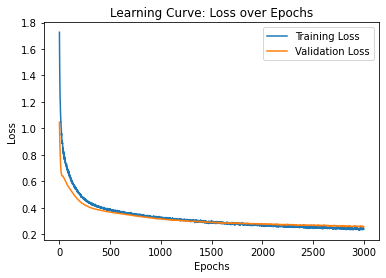

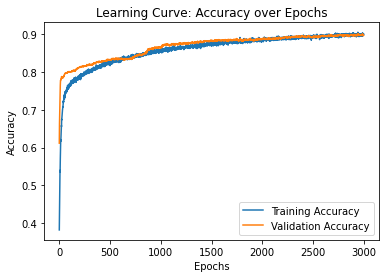

In [44]:
### Loss Graph
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Learning Curve: Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'])

### Accuracy Graph
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Learning Curve: Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

On 7776 samples of untrained(test) dataset:
Prediction:
[1 1 1 ... 1 1 0]
Actual:
[1 1 1 ... 1 1 0]

Classification Report:
               precision    recall  f1-score   support

Had no stroke       1.00      0.85      0.92      3929
   Had stroke       0.86      1.00      0.93      3847

     accuracy                           0.92      7776
    macro avg       0.93      0.92      0.92      7776
 weighted avg       0.93      0.92      0.92      7776



Text(0.5, 1.0, 'Confusion Matrix')

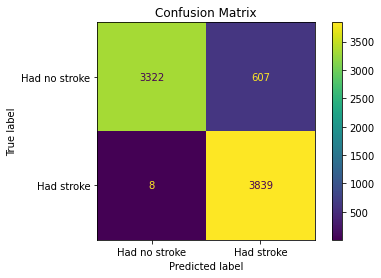

In [45]:
label_names = ["Had no stroke", "Had stroke"] # 0 patient had no stroke, 1 patient had stroke
y_actual = y_train.to_numpy()
y_pred = model.predict(X_train, verbose=0)
y_pred = np.argmax(y_pred, axis=-1)

print("On {} samples of untrained(test) dataset:".format(len(y_pred)))
print("Prediction:")
print(y_pred)
print("Actual:")
print(y_actual)

### Classification Report
print("\nClassification Report:")
print(classification_report(y_actual,y_pred, target_names=label_names))

### Confusion Matrix Graph
cm = confusion_matrix(y_true=y_actual, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.title('Confusion Matrix')

In [46]:
model.save("trained_model.h5")

In [47]:
import pickle
import os

scaler_path = os.path.join('/home/bhargav/College Project/Stroke_Prediction','scaler.pkl')
with open(scaler_path,"wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [48]:
# from keras.models import load_model
# model = load_model("trained_model.h5")

In [49]:
# label_names = ["Had no stroke", "Had stroke"] # 0 patient had no stroke, 1 patient had stroke
# y_actual = y_train.to_numpy()
# y_pred = model.predict(X_train, verbose=0)
# y_pred = np.argmax(y_pred, axis=-1)

# print("On {} samples of untrained(test) dataset:".format(len(y_pred)))
# print("Prediction:")
# print(y_pred)
# print("Actual:")
# print(y_actual)

# ### Classification Report
# print("\nClassification Report:")
# print(classification_report(y_actual,y_pred, target_names=label_names))

# ### Confusion Matrix Graph
# cm = confusion_matrix(y_true=y_actual, y_pred=y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
# disp.plot()
# plt.title('Confusion Matrix')